In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import time
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, average_precision_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
def get_auc_from_clf(clf, X, Y, score_fn):
    pred = clf.predict_proba(X)[:,1]
    return score_fn(Y, pred)

def custom_scorer(y_true, y_pred, actual_scorer):
    score = np.nan

    try:
      score = actual_scorer(y_true, y_pred)
    except Exception: 
      pass

    return score

def save_to_pickle(data, filename):
    with open(filename, 'wb') as fp:
        pickle.dump(data, fp, protocol=pickle.HIGHEST_PROTOCOL)
        
def load_from_pickle(filename):
    with open(filename, 'rb') as fp:
        data = pickle.load(fp)
    return data

In [3]:
seed = 5
# metric = 'aucroc'
# score_fn = roc_auc_score
metric = 'aucprc'
score_fn = average_precision_score
auc_score = make_scorer(custom_scorer, actual_scorer = score_fn, needs_threshold=True)
scoring = {metric: auc_score}

In [4]:
folder1 = 'dataset1'
folder2 = 'dataset2'

In [5]:
trainval_df1 = pd.read_csv(f'{folder1}/processed_trainval_data.csv')
display(trainval_df1.shape)
display(trainval_df1.head())
trainval_df2 = pd.read_csv(f'{folder2}/processed_trainval_data.csv')
display(trainval_df2.shape)
display(trainval_df2.head())

(1552, 28)

,X_Minimum,Square_Index,Length_of_Conveyer,Y_Perimeter,Edges_Y_Index,Maximum_of_Luminosity,X_Perimeter,Orientation_Index,Luminosity_Index,Empty_Index,Log_Y_Index,Outside_Global_Index,Minimum_of_Luminosity,Outside_X_Index,Edges_X_Index,Steel_Plate_Thickness,Y_Maximum,Edges_Index,Pixels_Areas,SigmoidOfAreas,LogOfAreas,Sum_of_Luminosity,TypeOfSteel_A400,TypeOfSteel_A300,Y_Minimum,Log_X_Index,X_Maximum,label
0,0.557185,0.579812,0.234568,0.000606,1.000000,0.481481,0.000670,0.709991,0.585558,0.264859,0.253411,1.0,0.566502,0.004231,0.774554,0.519231,0.065121,0.595458,0.000400,0.079682,0.306859,0.000648,1.0,0.0,0.065121,0.196206,0.557636,0
1,0.000000,0.109307,0.231041,0.006556,1.000000,0.259259,0.008711,0.945327,0.352651,0.547410,0.488224,1.0,0.251232,0.010064,0.138088,0.115385,0.051667,0.000000,0.005306,0.999886,0.534254,0.005177,0.0,1.0,0.051659,0.304749,0.005851,0
2,0.024047,0.955430,0.305115,0.025784,0.336801,0.490741,0.072174,0.477531,0.552651,0.521665,0.525512,0.0,0.108374,0.146157,0.228287,0.000000,0.075784,0.058883,0.104118,1.000000,0.798800,0.159364,1.0,0.0,0.075772,0.705600,0.127560,0
3,0.022874,0.973480,0.308642,0.017024,0.464376,0.490741,0.047669,0.513088,0.553870,0.432673,0.512316,1.0,0.152709,0.119053,0.285714,0.000000,0.113532,0.055868,0.087172,1.000000,0.782989,0.133714,1.0,0.0,0.113521,0.674083,0.107080,0
4,0.687977,0.573359,0.222222,0.001377,1.000000,0.393519,0.001723,0.713219,0.492566,0.358618,0.332261,1.0,0.379310,0.010979,0.746347,0.038462,0.082096,0.245076,0.001677,0.593871,0.432261,0.002284,0.0,1.0,0.082095,0.315567,0.692803,0


(1178, 22)

,media_exposure,wife_religion,num_children_born,wife_working,wife_age,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,husband_education_4,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4,standard_of_living_index_1,standard_of_living_index_2,standard_of_living_index_3,standard_of_living_index_4,label
0,0,0,2,1,28,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1,1,1,0,27,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,0,1,2,1,28,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,0,1,3,1,24,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,0,0,4,1,35,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [6]:
test_df1 = pd.read_csv(f'{folder1}/processed_test_data.csv')
display(test_df1.shape)
display(test_df1.head())
test_df2 = pd.read_csv(f'{folder2}/processed_test_data.csv')
display(test_df2.shape)
display(test_df2.head())

(389, 28)

,X_Minimum,Square_Index,Length_of_Conveyer,Y_Perimeter,Edges_Y_Index,Maximum_of_Luminosity,X_Perimeter,Orientation_Index,Luminosity_Index,Empty_Index,Log_Y_Index,Outside_Global_Index,Minimum_of_Luminosity,Outside_X_Index,Edges_X_Index,Steel_Plate_Thickness,Y_Maximum,Edges_Index,Pixels_Areas,SigmoidOfAreas,LogOfAreas,Sum_of_Luminosity,TypeOfSteel_A400,TypeOfSteel_A300,Y_Minimum,Log_X_Index,X_Maximum,label
0,0.344868,0.887970,0.746032,0.000441,1.000000,0.416667,0.000766,0.555858,0.539732,0.250132,0.224059,1.0,0.472906,0.003888,0.797078,0.115385,0.134446,0.716137,0.000347,0.066175,0.294796,0.000517,0.0,1.0,0.134447,0.217122,0.346401,0
1,0.026979,0.404154,0.234568,0.005344,0.528163,0.439815,0.018666,0.201796,0.497867,0.445598,0.406791,0.0,0.182266,0.109332,0.665280,0.000000,0.014071,0.067926,0.027042,1.000000,0.678928,0.037291,1.0,0.0,0.014068,0.656161,0.101814,0
2,0.059238,0.928002,0.700176,0.000716,1.000000,0.416667,0.001532,0.535835,0.511883,0.244517,0.269120,1.0,0.443350,0.007434,0.718141,0.115385,0.112502,0.125000,0.000904,0.216459,0.377885,0.001279,0.0,1.0,0.112502,0.293138,0.064365,0
3,0.078592,0.246647,0.227513,0.005124,0.921711,0.402778,0.008806,0.876633,0.515174,0.623795,0.455421,1.0,0.463054,0.016812,0.222808,0.115385,0.031199,0.198553,0.005142,1.000000,0.531468,0.007335,0.0,1.0,0.031193,0.375536,0.088941,0
4,0.357771,1.000000,0.282187,0.000826,0.934321,0.416667,0.001244,0.499823,0.552834,0.249603,0.276164,0.5,0.497537,0.010636,1.000000,0.000000,0.040238,0.883842,0.001114,0.289444,0.396195,0.001704,1.0,0.0,0.040238,0.315567,0.363370,0


(295, 22)

,media_exposure,wife_religion,num_children_born,wife_working,wife_age,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,husband_education_4,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4,standard_of_living_index_1,standard_of_living_index_2,standard_of_living_index_3,standard_of_living_index_4,label
0,0,1,7,0,34,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,0,1,1,0,22,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,1,1,10,1,41,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0,1,6,0,47,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
4,0,1,3,1,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [7]:
features1 = list(set(trainval_df1.columns) - set(['label']))
label1 = ['label']
trainval_X1 = trainval_df1[features1]
trainval_Y1 = trainval_df1[label1]
test_X1 = test_df1[features1]
test_Y1 = test_df1[label1]

features2 = list(set(trainval_df2.columns) - set(['label']))
label2 = ['label']
trainval_X2 = trainval_df2[features2]
trainval_Y2 = trainval_df2[label2]
test_X2 = test_df2[features2]
test_Y2 = test_df2[label2]

In [8]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(trainval_X1, trainval_Y1)
for train_index, test_index in sss.split(trainval_X1, trainval_Y1):
    train_X1, val_X1 = trainval_X1.iloc[train_index], trainval_X1.iloc[test_index]
    train_Y1, val_Y1 = trainval_Y1.iloc[train_index], trainval_Y1.iloc[test_index]
    
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(trainval_X2, trainval_Y2)
for train_index, test_index in sss.split(trainval_X2, trainval_Y2):
    train_X2, val_X2 = trainval_X2.iloc[train_index], trainval_X2.iloc[test_index]
    train_Y2, val_Y2 = trainval_Y2.iloc[train_index], trainval_Y2.iloc[test_index]

In [9]:
train_X1.reset_index(drop=True,inplace=True)
val_X1.reset_index(drop=True,inplace=True)
train_Y1.reset_index(drop=True,inplace=True)
val_Y1.reset_index(drop=True,inplace=True)

train_X2.reset_index(drop=True,inplace=True)
val_X2.reset_index(drop=True,inplace=True)
train_Y2.reset_index(drop=True,inplace=True)
val_Y2.reset_index(drop=True,inplace=True)

### Pruning analysis

In [10]:
clfs = [DecisionTreeClassifier(random_state=seed), DecisionTreeClassifier(random_state=seed)]
paths = [clfs[0].cost_complexity_pruning_path(train_X1, train_Y1),
         clfs[1].cost_complexity_pruning_path(train_X2, train_Y2)]
ccp_alphas = [path.ccp_alphas for path in paths]
impurities = [path.impurities for path in paths]

clfs_dict = {'ds1': [], 'ds2': []}

for idx, (ds_idx, train_X, train_Y) in enumerate(zip(['ds1', 'ds2'], [train_X1, train_X2], [train_Y1, train_Y2])):
    ds_ccp_alphas = ccp_alphas[idx]
    for ccp_alpha in ds_ccp_alphas:
        clf = DecisionTreeClassifier(random_state=seed, ccp_alpha=ccp_alpha)
        clf.fit(train_X, train_Y)
        clfs_dict[ds_idx].append(clf)
    print(f"Number of nodes in the last tree in {ds_idx} is: {clfs_dict[ds_idx][-1].tree_.node_count} with ccp_alpha: {ds_ccp_alphas[-1]}")


Number of nodes in the last tree in ds1 is: 1 with ccp_alpha: 0.012603675922358544
Number of nodes in the last tree in ds2 is: 1 with ccp_alpha: 0.041239941327558594


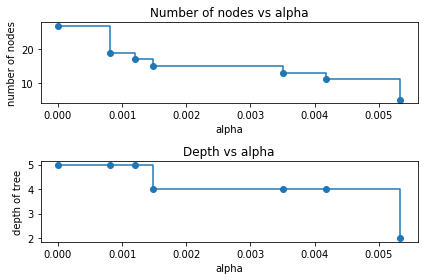

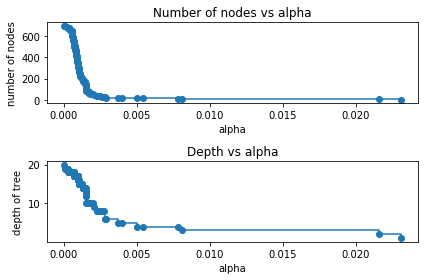

In [11]:
for idx, ds_idx in enumerate(['ds1', 'ds2']):
    
    clfs_dict[ds_idx] = clfs_dict[ds_idx][:-1]
    ccp_alphas[idx] = ccp_alphas[idx][:-1]
    node_counts = [clf.tree_.node_count for clf in clfs_dict[ds_idx]]
    depth = [clf.tree_.max_depth for clf in clfs_dict[ds_idx]]
    
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(ccp_alphas[idx], node_counts, marker='o', drawstyle="steps-post")
    ax[0].set_xlabel("alpha")
    ax[0].set_ylabel("number of nodes")
    ax[0].set_title("Number of nodes vs alpha")
    ax[1].plot(ccp_alphas[idx], depth, marker='o', drawstyle="steps-post")
    ax[1].set_xlabel("alpha")
    ax[1].set_ylabel("depth of tree")
    ax[1].set_title("Depth vs alpha")
    fig.tight_layout()

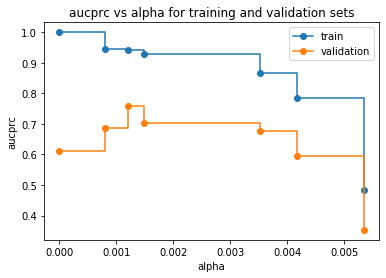

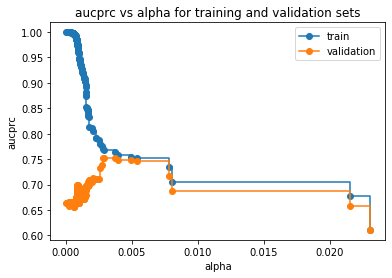

In [12]:
for idx, (ds_idx, train_X, train_Y, val_X, val_Y) in enumerate(zip(['ds1', 'ds2'], 
                                                              [train_X1, train_X2], [train_Y1, train_Y2],
                                                              [val_X1, val_X2], [val_Y1, val_Y2])):

    train_aucs = [get_auc_from_clf(clf, train_X, train_Y, score_fn) for clf in clfs_dict[ds_idx]]
    val_aucs = [get_auc_from_clf(clf, val_X, val_Y, score_fn) for clf in clfs_dict[ds_idx]]

    fig, ax = plt.subplots()
    ax.set_xlabel("alpha")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} vs alpha for training and validation sets")
    ax.plot(ccp_alphas[idx], train_aucs, marker='o', label="train",
            drawstyle="steps-post")
    ax.plot(ccp_alphas[idx], val_aucs, marker='o', label="validation",
            drawstyle="steps-post")
    ax.legend(loc=0)
    plt.show()

### hyperparameters tuning for performance comparison across algorithms

In [13]:
learner_dict = {'test_auc': [], 'fit_time': [], 'pred_time': []}
randm_search_res = []
final_clfs = []
for idx, (ds_idx, trainval_X, trainval_Y, test_X, test_Y) in enumerate(zip(['ds1', 'ds2'], 
                                                              [trainval_X1, trainval_X2], [trainval_Y1, trainval_Y2],
                                                              [test_X1, test_X2], [test_Y1, test_Y2])):

    clf = DecisionTreeClassifier(random_state=seed)
    parameters = {'max_depth': sp_randInt(2,50),
                  'min_samples_leaf': sp_randInt(2,50),
                  'ccp_alpha': sp_randFloat(0, 0.0005)}
    
    randm = RandomizedSearchCV(estimator=clf, param_distributions = parameters,
                               scoring=scoring, refit=metric,
                               cv = 5, n_iter = 100, n_jobs=-1, random_state=seed)
    randm.fit(trainval_X, trainval_Y)

    print("\n========================================================")
    print(" Results from Random Search " )
    print("========================================================")
    print("\n The best estimator across ALL searched params:\n",
          randm.best_estimator_)
    print("\n The best valid score across ALL searched params:\n",
          randm.best_score_)
    print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)
    print("\n ========================================================")

    final_clf = randm.best_estimator_
    test_auc = get_auc_from_clf(final_clf, test_X, test_Y, score_fn)
    print(f'\nThe best test score after hyperparameter search is {test_auc}')
    learner_dict['test_auc'].append(test_auc)
    randm_search_res.append(randm)
    final_clfs.append(final_clf)

    save_to_pickle(randm.best_params_, f'{ds_idx}_DT_params.pkl')


 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(ccp_alpha=0.0002618376447999395, class_weight=None,
                       criterion='gini', max_depth=43, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=5, splitter='best')

 The best valid score across ALL searched params:
 0.7802904711231994

 The best parameters across ALL searched params:
 {'ccp_alpha': 0.0002618376447999395, 'max_depth': 43, 'min_samples_leaf': 3}


The best test score after hyperparameter search is 0.512853470437018

 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(ccp_alpha=4.491051886880343e-05, class_weight=None,
                       criterion='gini', max_depth=29, 

### Wall clock time for dataset1 and dataset2

In [14]:
for idx, (ds_idx, train_X, train_Y, test_X, test_Y) in enumerate(zip(['ds1', 'ds2'],
                                                     [train_X1, train_X2],
                                                     [train_Y1, train_Y2],
                                                     [test_X1, test_X2],
                                                     [test_Y1, test_Y2])):
    
    best_params = randm_search_res[idx].best_params_
    clf = DecisionTreeClassifier(random_state=seed, **best_params)
    start_time = time.time()
    clf.fit(train_X, train_Y)
    time_taken = round(time.time() - start_time, 4)
    print(f'Training {ds_idx} took {time_taken} seconds of wall clock time')
    learner_dict['fit_time'].append(time_taken)
    
    start_time = time.time()
    pred = clf.predict_proba(test_X)[:,1]
    time_taken = round(time.time() - start_time, 4)
    print(f'Testing {ds_idx} took {time_taken} seconds of wall clock time')
    learner_dict['pred_time'].append(time_taken)

Training ds1 took 0.008 seconds of wall clock time
Testing ds1 took 0.0005 seconds of wall clock time
Training ds2 took 0.0018 seconds of wall clock time
Testing ds2 took 0.0005 seconds of wall clock time


In [15]:
save_to_pickle(learner_dict, 'dt_learner.pkl')

### Learning curve analysis

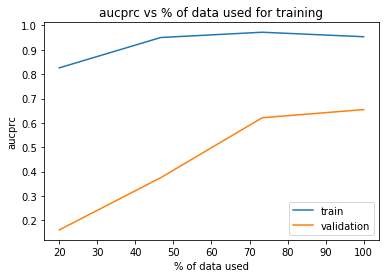

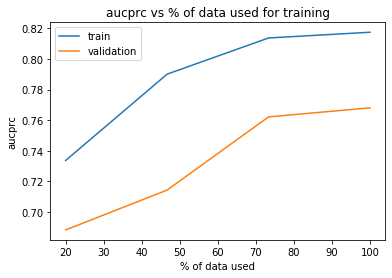

In [16]:
avg_train_auc_dict = {'ds1': [], 'ds2': []}
avg_val_auc_dict = {'ds1': [], 'ds2': []}
data_usages = np.linspace(0.2, 1, num = 4)

for idx, (ds_idx, trainval_X, trainval_Y) in enumerate(zip(['ds1', 'ds2'], 
                                                           [trainval_X1, trainval_X2],
                                                           [trainval_Y1, trainval_Y2])):
    best_params = randm_search_res[idx].best_params_
    clf = DecisionTreeClassifier(random_state=seed, **best_params)
    for data_usage in data_usages:
        temp_X = trainval_X.sample(frac = data_usage, replace=False, random_state=seed)
        temp_Y = trainval_Y.sample(frac = data_usage, replace=False, random_state=seed)
        scores = cross_validate(clf, temp_X, temp_Y, scoring=scoring, cv=3, return_train_score=True) 
        avg_train_auc_dict[ds_idx].append(np.mean(scores[f'train_{metric}']))
        avg_val_auc_dict[ds_idx].append(np.mean(scores[f'test_{metric}']))

    fig, ax = plt.subplots()
    ax.set_xlabel("% of data used")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} vs % of data used for training")
    ax.plot(data_usages*100, avg_train_auc_dict[ds_idx], label="train")
    ax.plot(data_usages*100, avg_val_auc_dict[ds_idx], label="validation")
    ax.legend(loc=0)
    plt.show()

### Model complexity analysis

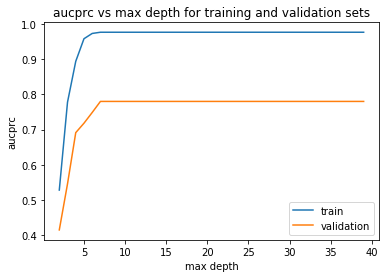

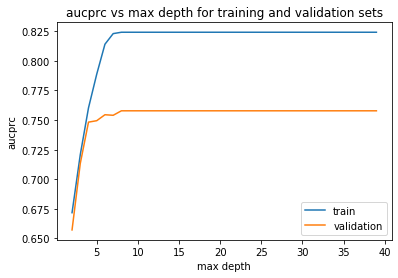

In [17]:
avg_train_auc_dict = {'ds1': [], 'ds2': []}
avg_val_auc_dict = {'ds1': [], 'ds2': []}
max_depths = range(2,40,1)

for idx, (ds_idx, trainval_X, trainval_Y) in enumerate(zip(['ds1', 'ds2'], 
                                                           [trainval_X1, trainval_X2],
                                                           [trainval_Y1, trainval_Y2])):
    best_params = randm_search_res[idx].best_params_
    for max_depth in max_depths:

        best_params['max_depth'] = max_depth
        clf = DecisionTreeClassifier(random_state=seed, 
                                     **best_params)
        scores = cross_validate(clf, trainval_X, trainval_Y, scoring=scoring, cv=5, return_train_score=True)
        avg_train_auc_dict[ds_idx].append(np.mean(scores[f'train_{metric}']))
        avg_val_auc_dict[ds_idx].append(np.mean(scores[f'test_{metric}']))
        
    fig, ax = plt.subplots()
    ax.set_xlabel("max depth")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} vs max depth for training and validation sets")
    ax.plot(max_depths, avg_train_auc_dict[ds_idx], label="train")
    ax.plot(max_depths, avg_val_auc_dict[ds_idx], label="validation")
    ax.legend(loc=0)
    plt.show()

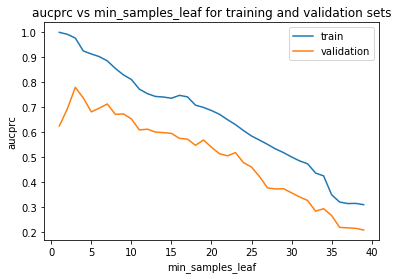

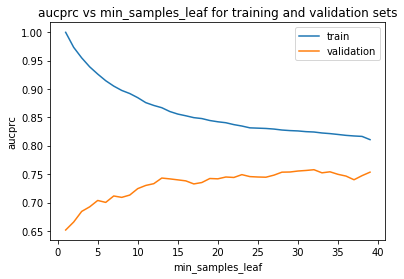

In [18]:
avg_train_auc_dict = {'ds1': [], 'ds2': []}
avg_val_auc_dict = {'ds1': [], 'ds2': []}
min_samples_leafs = range(1,40,1)

for idx, (ds_idx, trainval_X, trainval_Y) in enumerate(zip(['ds1', 'ds2'], 
                                                           [trainval_X1, trainval_X2],
                                                           [trainval_Y1, trainval_Y2])):
    best_params = randm_search_res[idx].best_params_
    clf = DecisionTreeClassifier(random_state=seed, **best_params)
    
    for min_samples_leaf in min_samples_leafs:
        best_params['min_samples_leaf'] = min_samples_leaf
        clf = DecisionTreeClassifier(random_state=seed, 
                                     **best_params)
        
        scores = cross_validate(clf, trainval_X, trainval_Y, scoring=scoring, cv=5, return_train_score=True)

        avg_train_auc_dict[ds_idx].append(np.mean(scores[f'train_{metric}']))
        avg_val_auc_dict[ds_idx].append(np.mean(scores[f'test_{metric}']))
        
    fig, ax = plt.subplots()
    ax.set_xlabel("min_samples_leaf")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} vs min_samples_leaf for training and validation sets")
    ax.plot(min_samples_leafs, avg_train_auc_dict[ds_idx], label="train")
    ax.plot(min_samples_leafs, avg_val_auc_dict[ds_idx], label="validation")
    ax.legend(loc=0)
    plt.show()